## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

        X1    X2    X3   X4     X5     X6    X7      X8   X9    X10   X11  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

      X12   X13     Y  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 



In [8]:
batch_size = 100
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### MSE Threshold and Mean Coeff Values 

1. Fetch MSE threshold for training the ABC-GAN 
2. The ABC-GAN will be trained until the threshold MSE is achieved or until it completes 5000 epochs 
3. The threshold mse is the mean mse of Catboost over 10 runs

In [9]:
books = sb.read_notebooks('./BaseLine_Model_Output')
catboostMSE = []
for nb in books.notebooks: 
    catboostMSE.append(nb.scraps['Catboost MSE'].data)
    
#Threshold MSE     
threshold_mse = mean(catboostMSE)

print(threshold_mse)

0.10094117185431159


# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [10]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.034573
0:	learn: 0.9806058	total: 56.9ms	remaining: 56.9s
1:	learn: 0.9606716	total: 58.1ms	remaining: 29s
2:	learn: 0.9390920	total: 59ms	remaining: 19.6s
3:	learn: 0.9209237	total: 60ms	remaining: 14.9s
4:	learn: 0.9046978	total: 61ms	remaining: 12.1s
5:	learn: 0.8896854	total: 61.8ms	remaining: 10.2s
6:	learn: 0.8724151	total: 62.7ms	remaining: 8.89s
7:	learn: 0.8558633	total: 63.6ms	remaining: 7.88s
8:	learn: 0.8400199	total: 64.5ms	remaining: 7.11s
9:	learn: 0.8229065	total: 65.5ms	remaining: 6.48s
10:	learn: 0.8057776	total: 66.6ms	remaining: 5.99s
11:	learn: 0.7907426	total: 68.2ms	remaining: 5.62s
12:	learn: 0.7753485	total: 69.3ms	remaining: 5.26s
13:	learn: 0.7601130	total: 70.3ms	remaining: 4.95s
14:	learn: 0.7475256	total: 71.2ms	remaining: 4.67s
15:	learn: 0.7326054	total: 72.1ms	remaining: 4.43s
16:	learn: 0.7206853	total: 73.2ms	remaining: 4.23s
17:	learn: 0.7077303	total: 74.1ms	remaining: 4.04s
18:	learn: 0.6955287	total: 74.8ms	remaining: 3.86s


92:	learn: 0.3195327	total: 147ms	remaining: 1.44s
93:	learn: 0.3177265	total: 149ms	remaining: 1.43s
94:	learn: 0.3159930	total: 150ms	remaining: 1.43s
95:	learn: 0.3146725	total: 151ms	remaining: 1.42s
96:	learn: 0.3128617	total: 152ms	remaining: 1.42s
97:	learn: 0.3114186	total: 153ms	remaining: 1.41s
98:	learn: 0.3101878	total: 154ms	remaining: 1.4s
99:	learn: 0.3091652	total: 155ms	remaining: 1.4s
100:	learn: 0.3073446	total: 156ms	remaining: 1.39s
101:	learn: 0.3059717	total: 158ms	remaining: 1.39s
102:	learn: 0.3044976	total: 159ms	remaining: 1.38s
103:	learn: 0.3030824	total: 160ms	remaining: 1.38s
104:	learn: 0.3013455	total: 161ms	remaining: 1.37s
105:	learn: 0.2996238	total: 162ms	remaining: 1.37s
106:	learn: 0.2980370	total: 163ms	remaining: 1.36s
107:	learn: 0.2965967	total: 164ms	remaining: 1.36s
108:	learn: 0.2951864	total: 165ms	remaining: 1.35s
109:	learn: 0.2942861	total: 166ms	remaining: 1.34s
110:	learn: 0.2932928	total: 167ms	remaining: 1.34s
111:	learn: 0.2916150	

132:	learn: 0.2696005	total: 190ms	remaining: 1.24s
133:	learn: 0.2686078	total: 193ms	remaining: 1.24s
134:	learn: 0.2679522	total: 194ms	remaining: 1.25s
135:	learn: 0.2666442	total: 195ms	remaining: 1.24s
136:	learn: 0.2656536	total: 196ms	remaining: 1.24s
137:	learn: 0.2644756	total: 197ms	remaining: 1.23s
138:	learn: 0.2634933	total: 199ms	remaining: 1.23s
139:	learn: 0.2624546	total: 200ms	remaining: 1.23s
140:	learn: 0.2619103	total: 201ms	remaining: 1.22s
141:	learn: 0.2611219	total: 202ms	remaining: 1.22s
142:	learn: 0.2604558	total: 203ms	remaining: 1.22s
143:	learn: 0.2590422	total: 204ms	remaining: 1.21s
144:	learn: 0.2583398	total: 204ms	remaining: 1.21s
145:	learn: 0.2574131	total: 206ms	remaining: 1.2s
146:	learn: 0.2561256	total: 207ms	remaining: 1.2s
147:	learn: 0.2550767	total: 208ms	remaining: 1.2s
148:	learn: 0.2541599	total: 210ms	remaining: 1.2s
149:	learn: 0.2534840	total: 210ms	remaining: 1.19s
150:	learn: 0.2527124	total: 211ms	remaining: 1.19s
151:	learn: 0.25

262:	learn: 0.1921215	total: 333ms	remaining: 933ms
263:	learn: 0.1917845	total: 334ms	remaining: 931ms
264:	learn: 0.1913103	total: 335ms	remaining: 929ms
265:	learn: 0.1909177	total: 336ms	remaining: 927ms
266:	learn: 0.1907412	total: 337ms	remaining: 925ms
267:	learn: 0.1903740	total: 338ms	remaining: 923ms
268:	learn: 0.1899360	total: 339ms	remaining: 922ms
269:	learn: 0.1895180	total: 340ms	remaining: 919ms
270:	learn: 0.1891081	total: 341ms	remaining: 918ms
271:	learn: 0.1885078	total: 342ms	remaining: 916ms
272:	learn: 0.1880570	total: 343ms	remaining: 914ms
273:	learn: 0.1878407	total: 344ms	remaining: 911ms
274:	learn: 0.1873198	total: 345ms	remaining: 909ms
275:	learn: 0.1869052	total: 347ms	remaining: 909ms
276:	learn: 0.1864395	total: 348ms	remaining: 907ms
277:	learn: 0.1860639	total: 348ms	remaining: 905ms
278:	learn: 0.1858336	total: 349ms	remaining: 902ms
279:	learn: 0.1855815	total: 350ms	remaining: 900ms
280:	learn: 0.1853155	total: 351ms	remaining: 898ms
281:	learn: 

306:	learn: 0.1752450	total: 377ms	remaining: 852ms
307:	learn: 0.1748989	total: 379ms	remaining: 852ms
308:	learn: 0.1745082	total: 380ms	remaining: 850ms
309:	learn: 0.1740813	total: 381ms	remaining: 848ms
310:	learn: 0.1738419	total: 382ms	remaining: 846ms
311:	learn: 0.1734089	total: 383ms	remaining: 844ms
312:	learn: 0.1731178	total: 384ms	remaining: 842ms
313:	learn: 0.1727077	total: 385ms	remaining: 840ms
314:	learn: 0.1723778	total: 386ms	remaining: 839ms
315:	learn: 0.1720145	total: 387ms	remaining: 837ms
316:	learn: 0.1715627	total: 388ms	remaining: 836ms
317:	learn: 0.1714053	total: 389ms	remaining: 834ms
318:	learn: 0.1709797	total: 390ms	remaining: 832ms
319:	learn: 0.1706233	total: 391ms	remaining: 832ms
320:	learn: 0.1703284	total: 393ms	remaining: 830ms
321:	learn: 0.1700544	total: 394ms	remaining: 829ms
322:	learn: 0.1696955	total: 395ms	remaining: 827ms
323:	learn: 0.1695203	total: 395ms	remaining: 825ms
324:	learn: 0.1693707	total: 401ms	remaining: 832ms
325:	learn: 

431:	learn: 0.1419280	total: 517ms	remaining: 680ms
432:	learn: 0.1417165	total: 518ms	remaining: 679ms
433:	learn: 0.1413963	total: 519ms	remaining: 677ms
434:	learn: 0.1412534	total: 520ms	remaining: 675ms
435:	learn: 0.1411935	total: 521ms	remaining: 674ms
436:	learn: 0.1409742	total: 522ms	remaining: 672ms
437:	learn: 0.1407767	total: 523ms	remaining: 671ms
438:	learn: 0.1406031	total: 524ms	remaining: 670ms
439:	learn: 0.1403399	total: 525ms	remaining: 668ms
440:	learn: 0.1401013	total: 526ms	remaining: 667ms
441:	learn: 0.1398140	total: 527ms	remaining: 666ms
442:	learn: 0.1396377	total: 528ms	remaining: 664ms
443:	learn: 0.1393831	total: 529ms	remaining: 663ms
444:	learn: 0.1391377	total: 530ms	remaining: 661ms
445:	learn: 0.1388608	total: 532ms	remaining: 661ms
446:	learn: 0.1386018	total: 533ms	remaining: 659ms
447:	learn: 0.1384516	total: 534ms	remaining: 658ms
448:	learn: 0.1382484	total: 535ms	remaining: 656ms
449:	learn: 0.1381172	total: 536ms	remaining: 655ms
450:	learn: 

476:	learn: 0.1326175	total: 562ms	remaining: 616ms
477:	learn: 0.1323752	total: 563ms	remaining: 615ms
478:	learn: 0.1321612	total: 564ms	remaining: 613ms
479:	learn: 0.1319673	total: 565ms	remaining: 612ms
480:	learn: 0.1317569	total: 565ms	remaining: 610ms
481:	learn: 0.1316297	total: 566ms	remaining: 609ms
482:	learn: 0.1313648	total: 567ms	remaining: 607ms
483:	learn: 0.1311941	total: 569ms	remaining: 607ms
484:	learn: 0.1311450	total: 570ms	remaining: 605ms
485:	learn: 0.1308531	total: 571ms	remaining: 604ms
486:	learn: 0.1307057	total: 572ms	remaining: 603ms
487:	learn: 0.1304885	total: 573ms	remaining: 601ms
488:	learn: 0.1304035	total: 574ms	remaining: 600ms
489:	learn: 0.1301327	total: 575ms	remaining: 599ms
490:	learn: 0.1298688	total: 576ms	remaining: 598ms
491:	learn: 0.1296635	total: 577ms	remaining: 596ms
492:	learn: 0.1294247	total: 578ms	remaining: 595ms
493:	learn: 0.1291426	total: 579ms	remaining: 593ms
494:	learn: 0.1289251	total: 580ms	remaining: 592ms
495:	learn: 

625:	learn: 0.1070961	total: 705ms	remaining: 421ms
626:	learn: 0.1069382	total: 706ms	remaining: 420ms
627:	learn: 0.1068121	total: 707ms	remaining: 419ms
628:	learn: 0.1067677	total: 708ms	remaining: 418ms
629:	learn: 0.1065973	total: 709ms	remaining: 417ms
630:	learn: 0.1064570	total: 710ms	remaining: 415ms
631:	learn: 0.1062685	total: 711ms	remaining: 414ms
632:	learn: 0.1061090	total: 712ms	remaining: 413ms
633:	learn: 0.1059192	total: 713ms	remaining: 412ms
634:	learn: 0.1058047	total: 714ms	remaining: 410ms
635:	learn: 0.1057053	total: 715ms	remaining: 409ms
636:	learn: 0.1055607	total: 716ms	remaining: 408ms
637:	learn: 0.1054055	total: 716ms	remaining: 406ms
638:	learn: 0.1052368	total: 717ms	remaining: 405ms
639:	learn: 0.1051218	total: 719ms	remaining: 404ms
640:	learn: 0.1050284	total: 720ms	remaining: 403ms
641:	learn: 0.1049071	total: 721ms	remaining: 402ms
642:	learn: 0.1047205	total: 721ms	remaining: 401ms
643:	learn: 0.1045647	total: 723ms	remaining: 400ms
644:	learn: 

672:	learn: 0.1003123	total: 752ms	remaining: 365ms
673:	learn: 0.1002307	total: 753ms	remaining: 364ms
674:	learn: 0.1001227	total: 754ms	remaining: 363ms
675:	learn: 0.0999435	total: 754ms	remaining: 362ms
676:	learn: 0.0997700	total: 755ms	remaining: 360ms
677:	learn: 0.0996536	total: 756ms	remaining: 359ms
678:	learn: 0.0995770	total: 756ms	remaining: 358ms
679:	learn: 0.0993900	total: 757ms	remaining: 356ms
680:	learn: 0.0992873	total: 758ms	remaining: 355ms
681:	learn: 0.0991521	total: 759ms	remaining: 354ms
682:	learn: 0.0990203	total: 760ms	remaining: 353ms
683:	learn: 0.0988818	total: 761ms	remaining: 352ms
684:	learn: 0.0988174	total: 762ms	remaining: 350ms
685:	learn: 0.0987647	total: 763ms	remaining: 349ms
686:	learn: 0.0986617	total: 764ms	remaining: 348ms
687:	learn: 0.0985320	total: 765ms	remaining: 347ms
688:	learn: 0.0983583	total: 766ms	remaining: 346ms
689:	learn: 0.0983409	total: 767ms	remaining: 344ms
690:	learn: 0.0982958	total: 767ms	remaining: 343ms
691:	learn: 

823:	learn: 0.0833678	total: 894ms	remaining: 191ms
824:	learn: 0.0833064	total: 895ms	remaining: 190ms
825:	learn: 0.0831463	total: 896ms	remaining: 189ms
826:	learn: 0.0830545	total: 897ms	remaining: 188ms
827:	learn: 0.0829920	total: 897ms	remaining: 186ms
828:	learn: 0.0829252	total: 898ms	remaining: 185ms
829:	learn: 0.0827970	total: 899ms	remaining: 184ms
830:	learn: 0.0826774	total: 900ms	remaining: 183ms
831:	learn: 0.0826484	total: 901ms	remaining: 182ms
832:	learn: 0.0825145	total: 902ms	remaining: 181ms
833:	learn: 0.0823617	total: 902ms	remaining: 180ms
834:	learn: 0.0822500	total: 903ms	remaining: 178ms
835:	learn: 0.0822379	total: 904ms	remaining: 177ms
836:	learn: 0.0821608	total: 905ms	remaining: 176ms
837:	learn: 0.0821032	total: 906ms	remaining: 175ms
838:	learn: 0.0820332	total: 907ms	remaining: 174ms
839:	learn: 0.0819998	total: 908ms	remaining: 173ms
840:	learn: 0.0819906	total: 908ms	remaining: 172ms
841:	learn: 0.0819694	total: 909ms	remaining: 171ms
842:	learn: 

877:	learn: 0.0785631	total: 941ms	remaining: 131ms
878:	learn: 0.0784847	total: 942ms	remaining: 130ms
879:	learn: 0.0783933	total: 943ms	remaining: 129ms
880:	learn: 0.0783030	total: 944ms	remaining: 127ms
881:	learn: 0.0781731	total: 945ms	remaining: 126ms
882:	learn: 0.0780528	total: 946ms	remaining: 125ms
883:	learn: 0.0779964	total: 946ms	remaining: 124ms
884:	learn: 0.0778651	total: 947ms	remaining: 123ms
885:	learn: 0.0777982	total: 948ms	remaining: 122ms
886:	learn: 0.0777130	total: 949ms	remaining: 121ms
887:	learn: 0.0776131	total: 950ms	remaining: 120ms
888:	learn: 0.0774755	total: 951ms	remaining: 119ms
889:	learn: 0.0773600	total: 951ms	remaining: 118ms
890:	learn: 0.0772587	total: 952ms	remaining: 116ms
891:	learn: 0.0771885	total: 953ms	remaining: 115ms
892:	learn: 0.0770842	total: 954ms	remaining: 114ms
893:	learn: 0.0770361	total: 955ms	remaining: 113ms
894:	learn: 0.0769862	total: 955ms	remaining: 112ms
895:	learn: 0.0768714	total: 956ms	remaining: 111ms
896:	learn: 

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.0907061786941692


#### Sanity Checks 

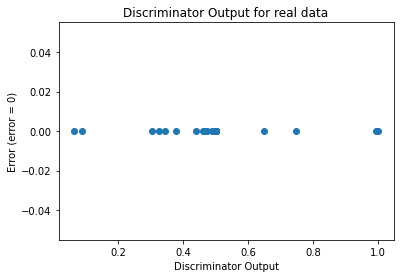

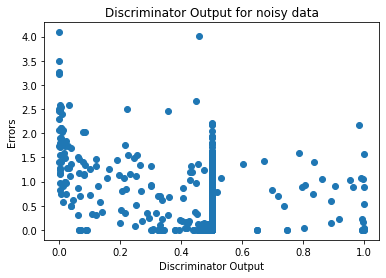

In [14]:
sanityChecks.discProbVsError(real_dataset,disc,device)

**Training ABC-GAN until mse of y_pred is > baseline_mse or n_epochs < 5000**

In [15]:
gen2 = network.Generator(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

In [16]:
discLossA2,genLossA2 = ABC_train_test2.training_GAN_2(disc2,gen2,disc_opt,gen_opt,train_data,test_data,batch_size,threshold_mse,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_2 Generator Loss",genLossA2)
sb.glue("ABC_GAN_2 Discriminator Loss",discLossA2)

Number of epochs 176


In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,"2",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MSE")
print(mean(ABC_GAN2_metrics[0]))

MSE
0.0860652046197696


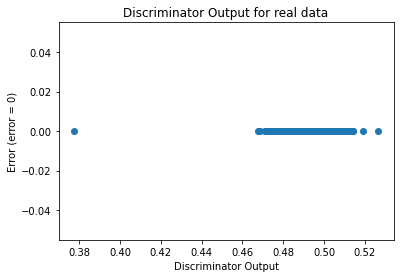

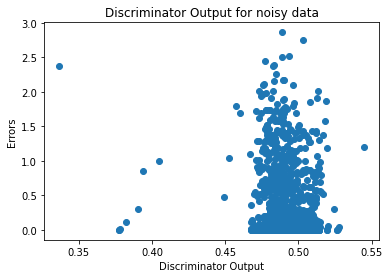

In [18]:
sanityChecks.discProbVsError(real_dataset,disc2,device)

# ABC - GAN Model with skip connection

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.016932478151969934


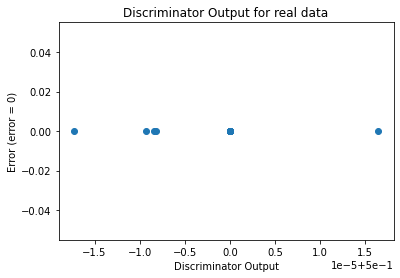

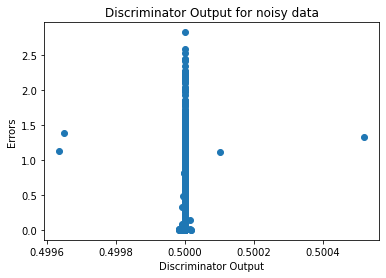

In [22]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [23]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0063]], requires_grad=True)
